#**NLP Assignment**

---

###You are given a JSON file (tweets.json) that contains tweets (sentences) along with the name of the author.


###**Objective 1:** Get the most frequent entities from the tweets.

###**Objective 2:** Find out the sentiment/polarity of each author towards each of the entities.


###**Sample Input:**

###**Assume we have only 4 tweets:**

Tweet1 by Author1: Pink Pearl Apples are tasty but Empire Apples are not.

Tweet2 by Author2: Empire Apples are very tasty.

Tweet3 by Author3: Pink Pearl Apples are not tasty.

Tweet4 by Author1: Pink Pearl Apples smells really good.

###**Sample output:**

**Entities in the topics extracted:** 

Share a CSV with extracted entities and the frequency of the extracted entity from all the tweets in the following format.

##**objective1.csv**

##**entity / frequency**

Pink  Pearl  Apples  2

Empire  Apples  2

**Sentiment/polarity of Authors:**

Share a CSV file with predicted sentiment values with extracted
entities as columns and unique authors as rows. See the example CSV below.

##**objective2.csv**

**entity / author_name / overall_polarity**

Pink Pearl Apples   Author1   Positive

Empire Apples Author1 Negative

Empire Apples Author2 Positive

Pink Pearl Apples Author3 Negative


###**Downloading and reading the JSON file:**

Get the JSON file here: http://bit.ly/akaiketech_cll_tweets_json

###**Python code for reading the JSON file:**

import json

with open('tweets.json') as jfile:

d = json.load(jfile)

d

would be a dictionary with tweet_id as key and another dictionary as a value. The inner dictionary contains the information tweet_text and tweet_author.

See the sample below.


{"1374140386071961602":
● {tweet_author:"Hematopoiesis News"
● tweet_text:"⚕️ Scientists conducted a Phase II study of acalabrutinib in
patients with relapsed/refractory #CLL who were ibrutinib-intolerant,
and found an overall response rate of 73%. https://t.co/eJ6m4QpC5P
https://t.co/kuZz6ZO47r"}
...
}


###Instructions:

Make sure to discuss the following aspects in a text document:

● Document your approach to solve the problem, discussing the difficulties and how your proposed solution tackles them.

● Discuss the technique used and the reason why you have chosen it.

● Discuss the shortcomings or mistakes of your proposed solution with a few examples.

● If there are any shortcomings or mistakes, discuss how you would go about tackling them given more resources and time.


###Keep this in mind while implementing your solution:

● The programming language used should be Python.

● You can use any NLP technique, library or code. For some ideas, explore notable NLP toolkits like NLTK, Spacy, StanfordNLP, AllenNLP, HuggingFace Transformers, and so on. (Note that the entire solution to this assignment won’t be directly available anywhere).

● Open source implementations of some research papers related to text mining and
different types of sentiment analysis could be of help too.

● Treat this as an open ended problem and solve as much as you could. ●
Any open source code used should be credited to the author or the source.

###Submission (share below files in a zipped folder):

1. Share a text document discussing the above-mentioned items.

2. Share all the code or notebooks that computed the output. (See sample output section for required output).

3. Use the following file names for sharing the final results and upload to the appropriate slot in the google forms

Objective 1 - objective1.csv

Objective 2 - objective2.csv

Use the column names and format exactly as described in the sample output section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import pandas as pd
import numpy as np
import re, spacy, nltk
from nltk.corpus import stopwords 
from nltk.util import ngrams 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import word_tokenize, pos_tag, pos_tag_sents
from textblob import TextBlob
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from googletrans import Translator

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('punkt')
nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##**Load the data**

In [ ]:
with open('/content/drive/MyDrive/Akaike/NLP Assignment/tweets.json') as jfile:
  df = json.load(jfile)
df

{'1374140386071961602': {'tweet_author': 'Hematopoiesis News',
  'tweet_text': '⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'},
 '1374032432173842437': {'tweet_author': 'Michael Wang, MD',
  'tweet_text': 'This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N'},
 '1373902876553048065': {'tweet_author': '1stOncology',
  'tweet_text': '#NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA'},
 '1373656782367813635': {'tweet_author': 'Toby Eyre',
  'tweet_text': '#acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly View | Haematologi

##Convert the data dictionary into DataFrame

In [ ]:
#Create dataframe of tweets dictionary
tweet_auth='tweet_author'
ta = [val[tweet_auth] for key, val in df.items() if tweet_auth in val]

tweet_txt='tweet_text'
tt = [val[tweet_txt] for key, val in df.items() if tweet_txt in val]

#Dropping id as it is of no use
df = pd.DataFrame(list(zip(ta, tt)), columns =['tweet_author', 'tweet_text'])

In [ ]:
df

,tweet_author,tweet_text
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...
...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...


##**Cleaning the tweets**

###Below user-defined function is to remove unwanted text in the tweets.

In [ ]:
def remove_pattern(input_text, pattern):
  r = re.findall(pattern, input_text)
  for each in r:
    input_text = re.sub(each, '', input_text)
  return input_text

####Removing the @user, hashtags, words starting with https, removing special characters. Lower strings.

In [ ]:
# removing '@user' 
df['cleaned_tweet_text'] = np.vectorize(remove_pattern)(df['tweet_text'], "@[\w]*")

# removing hashtags (word starting with #)
df['cleaned_tweet_text'] = np.vectorize(remove_pattern)(df['cleaned_tweet_text'], "#[\w]*")

#removing hashtags (word starting with https)
df['cleaned_tweet_text'] = np.vectorize(remove_pattern)(df['cleaned_tweet_text'], "https[\w]*")


# Removing special characters
df['cleaned_tweet_text'] = df['cleaned_tweet_text'].str.replace('[^a-zA-Z#]',' ')

#lowering string
df['cleaned_tweet_text'] = df['cleaned_tweet_text'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


## Tokenization
---------------
### Tokenization is a process of dividing the text into smaller segments. You can either divide the text into sentences, or words.

In [ ]:
# Tokenization

tokenized_tweet = df['cleaned_tweet_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [scientists, conducted, a, phase, ii, study, o...
1    [this, phase, acalabrutinib, venetoclax, av, t...
2                     [backs, for, t, co, vb, lpdogra]
3    [is, a, valuable, option, in, pts, intolerant,...
4    [nice, has, recommended, the, use, of, acalabr...
Name: cleaned_tweet_text, dtype: object

## Stemming
-----------
### Stemming is a text processing task in which we reduce the words to their root, which is the core part.

In [ ]:
ps=PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [scientist, conduct, a, phase, ii, studi, of, ...
1    [thi, phase, acalabrutinib, venetoclax, av, tr...
2                      [back, for, t, co, vb, lpdogra]
3    [is, a, valuabl, option, in, pt, intoler, to, ...
4    [nice, ha, recommend, the, use, of, acalabruti...
Name: cleaned_tweet_text, dtype: object

## Parts-of-speech tagging
--------------------------
### POS is a grammatical term that deals with the roles words play when you use them together in a sentence.

####Stitching the tokens back in the cleaned column

In [ ]:
# stitching the tokens back

for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=' '.join(tokenized_tweet[i])

df['cleaned_tweet_text'] = tokenized_tweet
df.head()

,tweet_author,tweet_text,cleaned_tweet_text
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientist conduct a phase ii studi of acalabru...
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,thi phase acalabrutinib venetoclax av trial th...
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,back for t co vb lpdogra
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,is a valuabl option in pt intoler to further v...
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice ha recommend the use of acalabrutinib for...


##Filtering the stop words

In [ ]:
stop = stopwords.words('english')

df['cleaned_tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0        scientist conduct phase ii studi acalabrutinib...
1        thi phase acalabrutinib venetoclax av trial st...
2                                       back co vb lpdogra
3        valuabl option pt intoler valuabl data help de...
4        nice ha recommend use acalabrutinib patient tr...
                               ...                        
43342                       hang friend http co pdleww bbb
43343                        hang friend http co gynchdnul
43344    zusatznutzen von ist weder f r noch f r refrak...
43345    ptk express immunochemotherapi outcom chronic ...
43346    mutat tlr myd pathway identifi subset young ch...
Name: cleaned_tweet_text, Length: 43347, dtype: object

In [ ]:
df

,tweet_author,tweet_text,cleaned_tweet_text
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientist conduct a phase ii studi of acalabru...
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,thi phase acalabrutinib venetoclax av trial th...
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,back for t co vb lpdogra
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,is a valuabl option in pt intoler to further v...
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice ha recommend the use of acalabrutinib for...
...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,hang out with friend http t co pdleww bbb
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,hang out with friend http t co gynchdnul
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,zusatznutzen von ist weder f r noch f r refrak...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,ptk express and immunochemotherapi outcom in c...


##Remove all the short words

---

Words that length is less than 2 letters

In [ ]:
tokenized_tweet = tokenized_tweet.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
#Creating a list of clean tweets 
tokenized_tweet = [' '.join([w for w in x.lower().split() if w not in stop_words]) for x in tokenized_tweet.tolist()]
tokenized_tweet

['scientist conduct phase studi acalabrutinib patient relaps refractori ibrutinib intoler found overal respons rate qpc kuzz',
 'thi phase acalabrutinib venetoclax trial still recruit phase studi well venetoclax acalabrutinib work mcl patient either relaps non respond initi therapi',
 'back lpdogra',
 'valuabl option intoler valuabl data help decis make earli view haematologica kclzax',
 'nice recommend use acalabrutinib patient treatment chronic lymphocyt leukemia find oujptlcin',
 'nice back astrazeneca calquenc cll jopnlnid pwi nkp',
 'thi england decis usual come wale info zshh ofdwedlav',
 'astrazeneca calquenc acalabrutinib chemotherapi free monotherapi offer patient chronic lymphocyt find qyuft sxve nggx',
 'superstar respond excel news nice approv acalabrutinib frontlin cll fcr unsuit patient lacvpotrwx',
 'cll patient know drug ibrutinib yesterday acalabrutinib approv new drug pirtobrutinib make big impact relaps patient recent murr kphsz',
 'optim manag high risk cll acalabru

In [ ]:
df

,tweet_author,tweet_text,cleaned_tweet_text
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientist conduct a phase ii studi of acalabru...
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,thi phase acalabrutinib venetoclax av trial th...
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,back for t co vb lpdogra
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,is a valuabl option in pt intoler to further v...
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice ha recommend the use of acalabrutinib for...
...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,hang out with friend http t co pdleww bbb
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,hang out with friend http t co gynchdnul
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,zusatznutzen von ist weder f r noch f r refrak...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,ptk express and immunochemotherapi outcom in c...


###**TextBlob is a python library that is built on top of nltk.**

it's easier to use and provides same additional funcitionality, such as rules-based sentiment scores.


--> In this problem, we are going to be use this function.

--> TextBlob finds all of the words and phrases that it can assign a polarity and subjectivity to an averages all of them together.

In [ ]:
def blob(text):
  return TextBlob(text).noun_phrases

Entities = df['cleaned_tweet_text'].apply(blob)
df["Entities"] = Entities

####Combining words into one list and count the appearance of each entity.

In [ ]:
lst = df["Entities"]

#Counting the most repeated entity
flatten = [i for sublist in lst for i in sublist]
count = Counter(flatten).most_common()

###Frequency counting of all the tweets

In [ ]:
Entities = pd.DataFrame.from_records(count, columns=['Entity', 'frequency'])
Entities['Entity'] = Entities['Entity'].apply(lambda x: ''.join([w for w in x]))

In [ ]:
Entities

,Entity,frequency
0,chronic lymphocyt leukemia,3509
1,chronic lymphocyt leukemia cll,476
2,chronic lymphocyt,438
3,adult amp,373
4,adult patient,277
...,...,...
79856,immunochemotherapi outcom,1
79857,chronic lymphocyt leukemia http t co rwziokjnka,1
79858,tlr myd pathway identifi,1
79859,young chronic lymphocyt leukemia patient,1


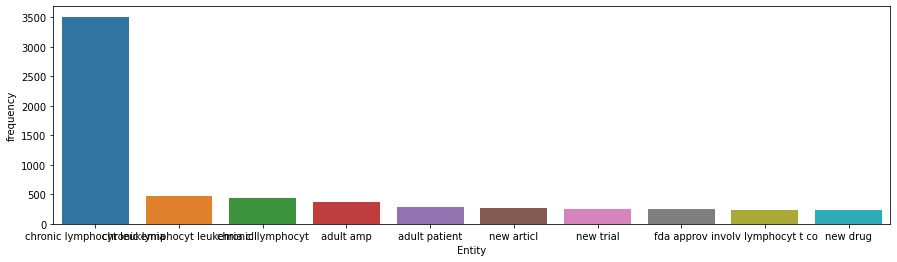

In [ ]:
#Data Visualization with bar graph
df1 = Entities.copy()

df1 = df1.nlargest(columns="frequency", n = 10) 
plt.figure(figsize=(15,4))

ax = sns.barplot(data=df1, x= "Entity", y = "frequency")
ax.set(ylabel = 'frequency')
plt.show()

##**Sample output:**


Entities in the topics extracted:

-->Share a CSV with extracted entities and the frequency of the
extracted entity from all the tweets in the following format
**objective1.csv**

###**Convert the entities dataframe into Objective.csv file**

In [ ]:
Entities.to_csv('/content/drive/MyDrive/Akaike/NLP Assignment/Objective1.csv', index=False)

##Display the most frequent Entities from the tweets

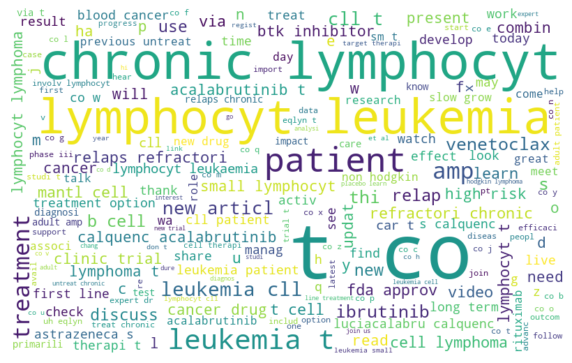

In [ ]:
all_words = ' '.join([text for text in df['cleaned_tweet_text']])
#Wc = wordcloud(width=800, height=500, random_state=21, max_font_size=110)
wc = WordCloud(background_color='white',mode="RGB", width=800 , height=500, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

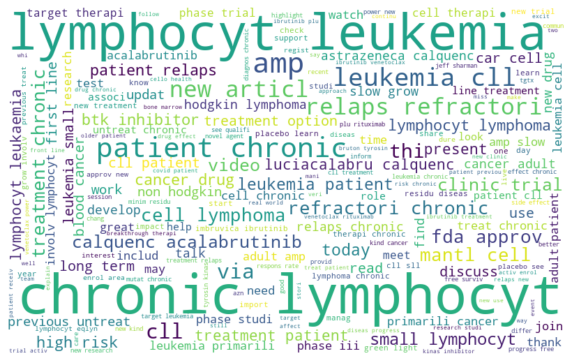

In [ ]:
# story generation and visualization

all_words = ' '.join([text for text in tokenized_tweet])
#WordCloud(width=800, height=500, random_state=21, max_font_size=110).generation(all_words)
wc = WordCloud(background_color='white',mode="RGB", width=800 , height=500, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

##**Solutions for Objective: 2**

---

####**Objective 2:** Find out the sentiment/polarity of each author towards each of the entities.


In [ ]:
df1 = df.copy()
df1

,tweet_author,tweet_text,cleaned_tweet_text,Entities
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientist conduct a phase ii studi of acalabru...,"[scientist conduct, phase ii studi, relaps ref..."
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,thi phase acalabrutinib venetoclax av trial th...,"[thi phase acalabrutinib venetoclax av trial, ..."
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,back for t co vb lpdogra,[t co vb lpdogra]
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,is a valuabl option in pt intoler to further v...,"[valuabl option, pt intoler, valuabl data, ear..."
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice ha recommend the use of acalabrutinib for...,"[treatment na ve chronic lymphocyt leukemia, t..."
...,...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,hang out with friend http t co pdleww bbb,[friend http t co pdleww bbb]
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,hang out with friend http t co gynchdnul,[friend http t co gynchdnul]
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,zusatznutzen von ist weder f r noch f r refrak...,[zusatznutzen von ist weder f r noch f r refra...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,ptk express and immunochemotherapi outcom in c...,"[ptk express, immunochemotherapi outcom, chron..."


In [ ]:
#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()

df1["cleaned_tweet_text"]= df1["Entities"].astype(str)

# Applying Model, Variable Creation
df1['Polarity Score'] = df1["Entities"].apply(lambda x:SIA.polarity_scores(x)['compound'])


df1['Negative Score']=df1["Entities"].apply(lambda x:SIA.polarity_scores(x)['neg'])

df1['Neutral Score']=df1["Entities"].apply(lambda x:SIA.polarity_scores(x)['neu'])

df1['Positive Score']=df1["Entities"].apply(lambda x:SIA.polarity_scores(x)['pos'])


# Converting 0 to 1 Decimal Score to a Categorical Variable
df1['overall polarity']=''

df1.loc[df1['Polarity Score']<0,'overall polarity']='Negative'

df1.loc[df1['Polarity Score']==0,'overall polarity']='Neutral'

df1.loc[df1['Polarity Score']>0,'overall polarity']='Positive'

df1.head()

,tweet_author,tweet_text,cleaned_tweet_text,Entities,Polarity Score,Negative Score,Neutral Score,Positive Score,overall polarity
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,"['scientist conduct', 'phase ii studi', 'relap...","[scientist conduct, phase ii studi, relaps ref...",0.000,0.0,1.000,0.000,Neutral
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,['thi phase acalabrutinib venetoclax av trial'...,"[thi phase acalabrutinib venetoclax av trial, ...",0.296,0.0,0.845,0.155,Positive
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,['t co vb lpdogra'],[t co vb lpdogra],0.000,0.0,1.000,0.000,Neutral
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,"['valuabl option', 'pt intoler', 'valuabl data...","[valuabl option, pt intoler, valuabl data, ear...",0.000,0.0,1.000,0.000,Neutral
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,"['treatment na ve chronic lymphocyt leukemia',...","[treatment na ve chronic lymphocyt leukemia, t...",0.000,0.0,1.000,0.000,Neutral


### Copying DataFrame1(df1) in DataFrame2(df2) for changing the the format for submission and conversion in csv file.

In [ ]:
df2=df1.copy()
df2

,tweet_author,tweet_text,cleaned_tweet_text,Entities,Polarity Score,Negative Score,Neutral Score,Positive Score,overall polarity
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,"['scientist conduct', 'phase ii studi', 'relap...","[scientist conduct, phase ii studi, relaps ref...",0.0000,0.0,1.000,0.000,Neutral
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,['thi phase acalabrutinib venetoclax av trial'...,"[thi phase acalabrutinib venetoclax av trial, ...",0.2960,0.0,0.845,0.155,Positive
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,['t co vb lpdogra'],[t co vb lpdogra],0.0000,0.0,1.000,0.000,Neutral
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,"['valuabl option', 'pt intoler', 'valuabl data...","[valuabl option, pt intoler, valuabl data, ear...",0.0000,0.0,1.000,0.000,Neutral
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,"['treatment na ve chronic lymphocyt leukemia',...","[treatment na ve chronic lymphocyt leukemia, t...",0.0000,0.0,1.000,0.000,Neutral
...,...,...,...,...,...,...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,['friend http t co pdleww bbb'],[friend http t co pdleww bbb],0.4939,0.0,0.610,0.390,Positive
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,['friend http t co gynchdnul'],[friend http t co gynchdnul],0.4939,0.0,0.556,0.444,Positive
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,['zusatznutzen von ist weder f r noch f r refr...,[zusatznutzen von ist weder f r noch f r refra...,0.0000,0.0,1.000,0.000,Neutral
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,"['ptk express', 'immunochemotherapi outcom', '...","[ptk express, immunochemotherapi outcom, chron...",0.0000,0.0,1.000,0.000,Neutral


###Dropping all columns except Entity , Author_Name and Overall_polarity

In [ ]:
df2=df2.drop(['tweet_text',	'cleaned_tweet_text',	'Polarity Score',	'Neutral Score',	'Negative Score',	'Positive Score'], axis=1)

#Making the entites along with author sentiments on it as a list
df2['Entities'] = [','.join([''.join(y) for y in x]) for x in df['Entities']]
df2

,tweet_author,Entities,overall polarity
0,Hematopoiesis News,"scientist conduct,phase ii studi,relaps refrac...",Neutral
1,"Michael Wang, MD","thi phase acalabrutinib venetoclax av trial,ac...",Positive
2,1stOncology,t co vb lpdogra,Neutral
3,Toby Eyre,"valuabl option,pt intoler,valuabl data,earli v...",Neutral
4,Lymphoma Hub,"treatment na ve chronic lymphocyt leukemia,t c...",Neutral
...,...,...,...
43342,Joy is a Lifestyle,friend http t co pdleww bbb,Positive
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,friend http t co gynchdnul,Positive
43344,IQWiG,zusatznutzen von ist weder f r noch f r refrak...,Neutral
43345,Medibooks,"ptk express,immunochemotherapi outcom,chronic ...",Neutral


###Change the order of columns what in the problem statements

In [ ]:
df2 = df2[['Entities','tweet_author','overall polarity']]

In [ ]:
df2.rename(columns = {'entity':'Entity','author':'Author', 'overall polarity': 'OverAll Polarity'}, inplace = True)

df2

,Entities,tweet_author,OverAll Polarity
0,"scientist conduct,phase ii studi,relaps refrac...",Hematopoiesis News,Neutral
1,"thi phase acalabrutinib venetoclax av trial,ac...","Michael Wang, MD",Positive
2,t co vb lpdogra,1stOncology,Neutral
3,"valuabl option,pt intoler,valuabl data,earli v...",Toby Eyre,Neutral
4,"treatment na ve chronic lymphocyt leukemia,t c...",Lymphoma Hub,Neutral
...,...,...,...
43342,friend http t co pdleww bbb,Joy is a Lifestyle,Positive
43343,friend http t co gynchdnul,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Positive
43344,zusatznutzen von ist weder f r noch f r refrak...,IQWiG,Neutral
43345,"ptk express,immunochemotherapi outcom,chronic ...",Medibooks,Neutral


In [ ]:
df2.to_csv('/content/drive/MyDrive/Akaike/NLP Assignment/Objective2.csv', index=False)

###**Displaying the Most frequent Entities in the topics extracted:**

In [ ]:
pd.read_csv('/content/drive/MyDrive/Akaike/NLP Assignment/Objective1.csv')

,Entity,frequency
0,chronic lymphocyt leukemia,3509
1,chronic lymphocyt leukemia cll,476
2,chronic lymphocyt,438
3,adult amp,373
4,adult patient,277
...,...,...
79856,immunochemotherapi outcom,1
79857,chronic lymphocyt leukemia http t co rwziokjnka,1
79858,tlr myd pathway identifi,1
79859,young chronic lymphocyt leukemia patient,1


###**Displaying the Sentiment/polarity of Authors**

In [ ]:
pd.read_csv('/content/drive/MyDrive/Akaike/NLP Assignment/Objective2.csv')

,Entities,tweet_author,OverAll Polarity
0,"scientist conduct,phase ii studi,relaps refrac...",Hematopoiesis News,Neutral
1,"thi phase acalabrutinib venetoclax av trial,ac...","Michael Wang, MD",Positive
2,t co vb lpdogra,1stOncology,Neutral
3,"valuabl option,pt intoler,valuabl data,earli v...",Toby Eyre,Neutral
4,"treatment na ve chronic lymphocyt leukemia,t c...",Lymphoma Hub,Neutral
...,...,...,...
43342,friend http t co pdleww bbb,Joy is a Lifestyle,Positive
43343,friend http t co gynchdnul,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Positive
43344,zusatznutzen von ist weder f r noch f r refrak...,IQWiG,Neutral
43345,"ptk express,immunochemotherapi outcom,chronic ...",Medibooks,Neutral


##Approaches:

##**Tried to solve the problems.**

####--> I know there is a lot of technology involved. All about it can be learned through experience.

####--> I hope we can learn this experience from your company.

####--> I may have omitted many of these. I think there is no understanding of it.

####--> There is no such thing as difficult. It would be even better if we got more time to know about it.

####--> A few shortcome in Solution, that is not affecting most of solution. Nouns phrases can be sometimes illogical, and treating as an Entity is a waste.


####--> Removing the subjects from the Tweets and other elements that look unnecessary, But unavoidable as something like Get high accuracy of the Machine learning.

####--> I have tried to solve as much as I can.

####--> For solving problems, I look at the reference from outside and fixed it as much as I can.

